In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, f1_score

from sklearn.metrics import r2_score,mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [213]:
data=pd.read_csv(r'C:\Users\hp\Desktop\Projects\train.csv')

In [215]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [217]:
data.shape

(20758, 18)

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [221]:
data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [223]:
data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [225]:
la=LabelEncoder()

In [227]:
obj=data.select_dtypes(include='object')
non_obj=data.select_dtypes(exclude='object')
for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=la.fit_transform(obj.iloc[:,i])
    

In [42]:
obj

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,1,1,1,2,0,0,1,3,6
1,0,1,1,1,0,0,2,0,1
2,0,1,1,2,0,0,2,3,0
3,0,1,1,2,0,0,1,3,4
4,1,1,1,2,0,0,1,3,6
...,...,...,...,...,...,...,...,...,...
20753,1,1,1,2,0,0,1,3,3
20754,1,0,1,1,0,0,1,3,0
20755,1,1,1,2,0,0,2,3,3
20756,1,1,1,2,0,0,2,0,6


In [231]:
non_obj

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...,...
20753,20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680
20754,20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000
20755,20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439
20756,20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834


In [233]:
obj=obj.astype('int')

In [235]:
df=pd.concat([obj,non_obj],axis=1)

In [237]:
data =df.interpolate(method='linear')
df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,1,3,6,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,0,1,1,1,0,0,2,0,1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,0,1,1,2,0,0,2,3,0,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,0,1,1,2,0,0,1,3,4,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,1,1,1,2,0,0,1,3,6,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,1,1,2,0,0,1,3,3,20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680
20754,1,0,1,1,0,0,1,3,0,20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000
20755,1,1,1,2,0,0,2,3,3,20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439
20756,1,1,1,2,0,0,2,0,6,20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834


# Create Model

In [416]:
x=data.drop(['Gender'],axis=1)
y=data['Gender']

In [418]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [420]:
model1=LogisticRegression()
model2=RandomForestClassifier()
model3=GaussianNB()
model4=SVC()
model5=DecisionTreeClassifier()
model6=GradientBoostingClassifier()

In [434]:
def cal(model):
        model.fit(x_train,y_train)
        pre=model.predict(x_test)
        accuracy=accuracy_score(pre,y_test)
        recall=recall_score(pre,y_test)
        f1=f1_score(pre,y_test)
        sns.heatmap(confusion_matrix(pre,y_test),annot=True)
        print(model)
        print('accuracy is : ',accuracy,'recall is',recall,'f1 is :', f1)

LogisticRegression()
accuracy is :  0.6676300578034682 recall is 0.6625796959293772 f1 is : 0.6619304262616365


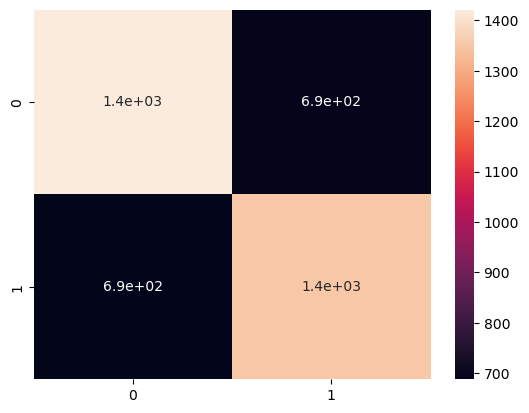

In [436]:
cal(model1)

RandomForestClassifier()
accuracy is :  0.9207610789980732 recall is 0.923837784371909 f1 is : 0.9190651906519065


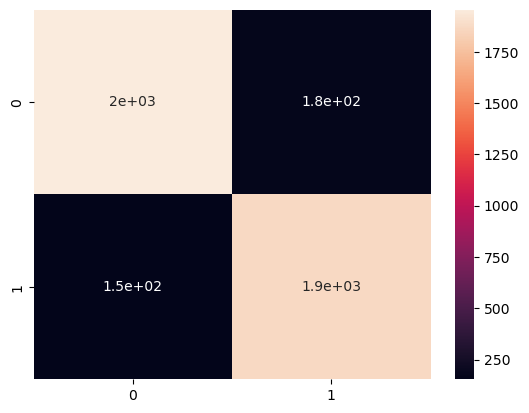

In [304]:
cal(model2)

GaussianNB()
accuracy is :  0.805635838150289 recall is 0.8315450643776824 f1 is : 0.7934476580496544


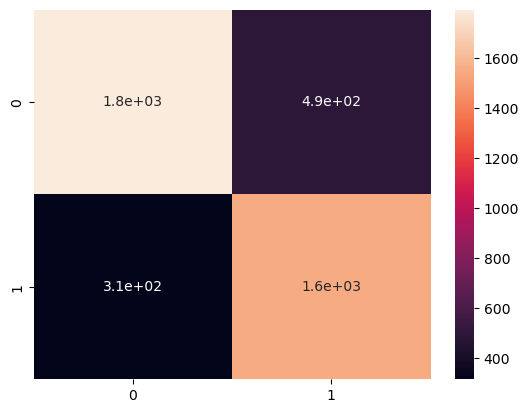

In [306]:
cal(model3)

SVC()
accuracy is :  0.8005780346820809 recall is 0.7793103448275862 f1 is : 0.8036984352773826


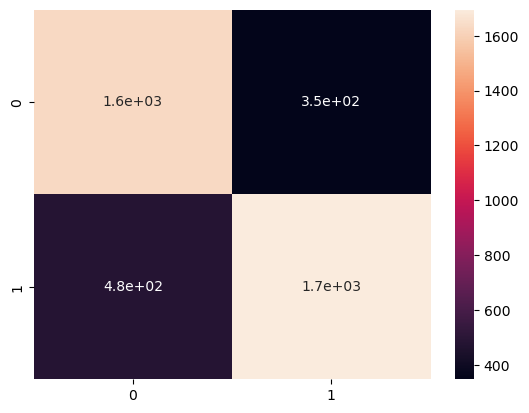

In [308]:
cal(model4)

DecisionTreeClassifier()
accuracy is :  0.8860789980732178 recall is 0.8897715988083416 f1 is : 0.8834113877249199


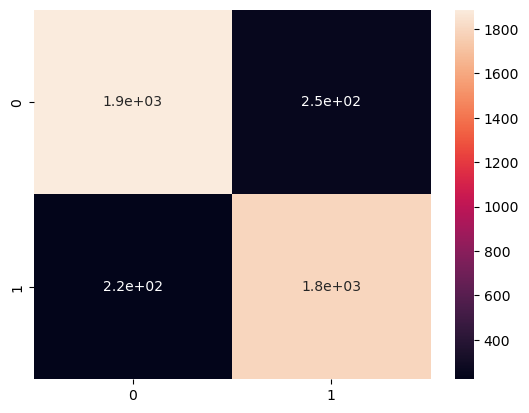

In [310]:
cal(model5)

GradientBoostingClassifier()
accuracy is :  0.9217244701348748 recall is 0.920666013712047 f1 is : 0.9204406364749081


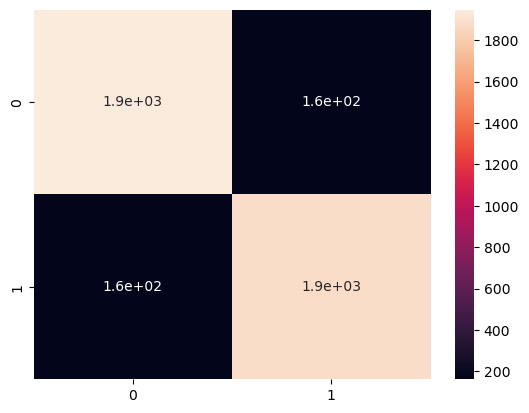

In [312]:
cal(model6)